# Machine learning - Multi-label Classification (Fashion-MNIST)


- Created by: Harmohat Khangura
- Date: 10/03/2023
- Version: 1.0

**overview**

- 1 What is the problem?
- 2 Prediction
- 3 Get the data
  - 3.1 Importing the 'Fashion-MNIST' dataset
  - 3.2 Minimizing dataset
  - 3.3 Printing data information
- 4 Clean and prepare data
  - 4.1 Convert each image to 28 x 28 image
  - 4.2 Convert type and rescale pixels
  - 4.3 Defining class names
  - 4.4 one-hot encoding
  - 4.5 Split Data into Train, Test
  - 4.6 Flatten data (`SVM`) 
- 5 Visualize data
  - 5.1 Plot sample images
- 6-`CNN`. Select and set model
- 6-`SVM`. Select and set model
- 7-`CNN`. Train and test model
- 7-`SVM`. Train and test model
- 8 Improve model 
  - 8.1 Convolutional Neural Network (CNN)
  - 8.2 Support Vector Machine (SVM)
- 9-`CNN`. Evaluate results
  - 9.1-`CNN` Loss and Metric values
  - 9.2-`CNN` R2-Score
  - 9.3-`CNN` Confusion Matrix
- 9-`SVM`. Evaluate results
  - 9.1-`SVM`. Accuracy score
  - 9.2-`SVM`. R2-Score
  - 9.3-`SVM`. Confusion Matrix
- 10 Conclusion

<span style="color: red;font-weight:bold;">NOTE!</span>

`CNN` =  Convolutional Neural Network <br>
`SVM` = Support Vector Machine

## 1. What is the problem?

**Dataset:**

Multi-label Classification: Fashion-MNIST dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## 2. Prediction

For the Fashion MNIST dataset, I predict that the SVM and CNN models will both perform well.

I chose the SVM model because it is a well-established algorithm for classification tasks and can efficiently handle high-dimensional data. The Fashion MNIST dataset has 784 features (28x28 pixels) which makes it suitable for SVM. 

I also chose the CNN model because it is widely used for image classification tasks and can automatically learn relevant features from the data. 

Overall, I think that both models will do a good job at predicting the type of clothes from the input image, but I think that the CNN model might do a little bit better because it can learn the relevant features from the data.

---

Importing the libraries to use

In [835]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


## 3. Get the data

### 3.1 - Importing the 'Fashion-MNIST' dataset

In [836]:
fashion_mnist = keras.datasets.fashion_mnist

In [837]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 3.2 - Minimizing dataset

Using a smaller subset of the data for training since the SVM model was taking a lot of time to train

In [838]:
x_train = x_train[:2000]
y_train = y_train[:2000]

### 3.3 - Printing data information

In [839]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}\n")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2000, 28, 28)
x_test shape: (10000, 28, 28)

y_train shape: (2000,)
y_test shape: (10000,)


In [840]:
print(f"x_train data type: {x_train.dtype}")
print(f"x_test data type: {x_test.dtype}\n")
print(f"y_train data type: {y_train.dtype}")
print(f"y_test data type: {y_test.dtype}")

x_train data type: uint8
x_test data type: uint8

y_train data type: uint8
y_test data type: uint8


## 4. Clean and prepare data

The Fashion-MNIST dataset is already cleaned and prepared. So I don't have to do a lot.

### 4.1 Convert each image to 28 x 28 image

In [841]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### 4.2 Convert type and rescale pixels

The network needs the types to be float32, and the pixel values in range 0 - 1

In [842]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### 4.3 Defining class names

After defining the class names it is now easy to map the numeric labels in the dataset (0 to 9) to their corresponding class names

In [843]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 4.4 one-hot encoding

 One-hot encoding because it is a multi-class classification problem with 10 classes

In [844]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### 4.5 Split Data into Train, Test

In [845]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

### 4.6 Flatten data (`SVM`)

The SVM model requires the input data to be in a flattened format,

In [846]:
y_train_flatten = np.argmax(y_train, axis=1).ravel()
y_test_flatten = np.argmax(y_test, axis=1).ravel()

In [847]:
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
num_features = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]

x_train_flat = x_train.reshape(num_train_samples, num_features)
x_test_flat = x_test.reshape(num_test_samples, num_features)

## 5. Visualize data

### 5.1 Plot sample images

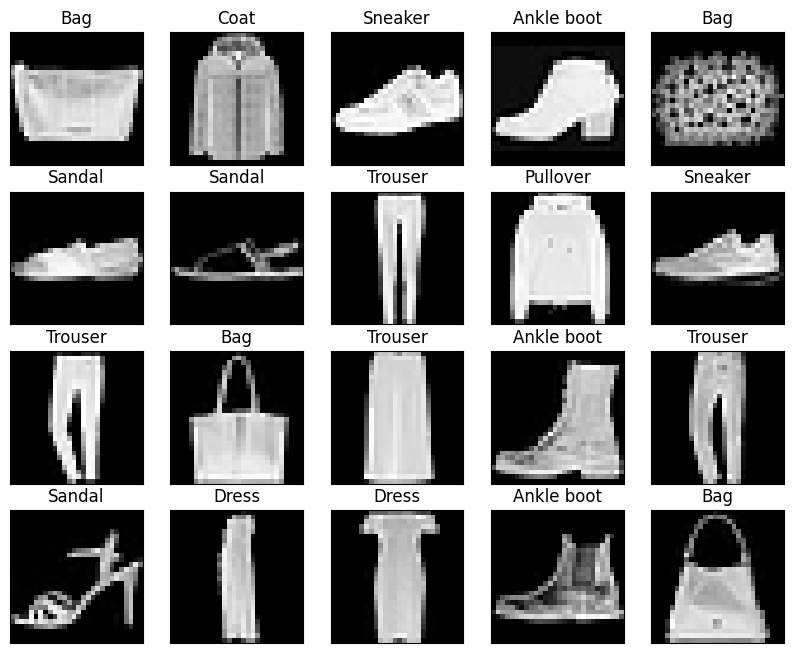

In [848]:
plt.figure(figsize=(10,10))

# Plots 25 images in a 5x5 grid
for i in range(20):
    # Creates a subplot at position i+1
    plt.subplot(5,5, i+1)

    # Removes the ticks and grid lines
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Shows the image in grayscale
    plt.imshow(x_train[i], cmap='gray')
    # Adds the label as a caption
    plt.title(class_names[np.argmax(y_train[i])])
plt.show()

## 6-`CNN`. Select and set model

- kernel is a small matrix of weights that is used to filter the input image. The kernel slides over the input  image and computes a dot product at each location, producing an output feature map.
  
  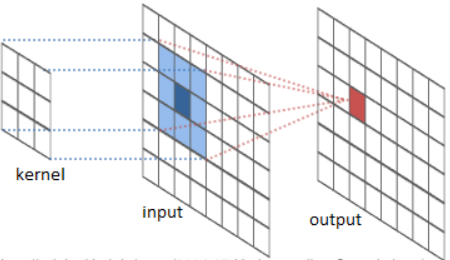 

- the pooling layer will divide the input feature map into non-overlapping 2x2 regions and output the maximum value from each region. 
  
  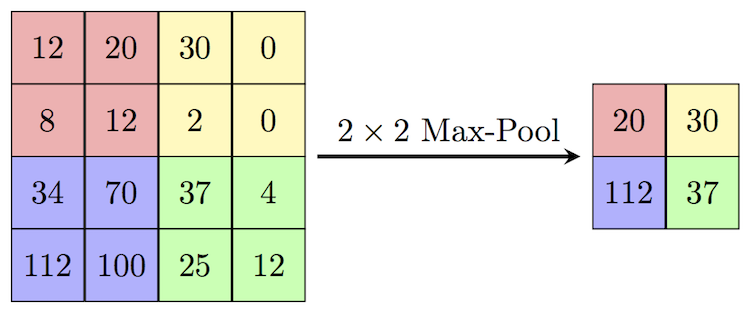

In [849]:
cnn_model = Sequential()

# Convolutional layer with 16 filters and a 3x3 kernel size, using the ReLU activation function and an input shape of (28, 28, 1)
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# MaxPooling layer with a pool size of 2x2
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D output into a 1D array
cnn_model.add(Flatten())

# Dense layer with 10 neurons and the softmax activation function to output the probability distribution across the 10 classes
cnn_model.add(Dense(10, activation='softmax'))

In [850]:
cnn_model.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 2704)              0         
                                                                 
 dense_35 (Dense)            (None, 10)                27050     
                                                                 
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


Compile to configure the learning process of the model

- `loss='categorical_crossentropy'`: Function that is used for multi-class classification problems, calculates the difference between the predicted and true class labels.

- `optimizer='adam'`: Optimizer that is used to update the weights of the model during training. Adam is a popular optimizer that adapts the learning rate based on the gradient of the loss function.

- `metrics=['accuracy']`: Used to measure the performance of the model during training and testing. In this case, we are using accuracy, which calculates the proportion of correctly classified images.

In [851]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 6-`SVM`. Select and set model

Model created with a radial basis function (RBF) kernel. The SVM model sets regularization parameter C (regulates the trade-off between obtaining a wide margin classification boundary and reducing the classification error.) of 1.0 and the gamma (determines the shape of the decision boundary) parameter is set to "auto". 

In [852]:
svm_model = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")

## 7-`CNN`. Train and test model

In [853]:
# Training the CNN using the training data
cnn_history = cnn_model.fit(x_train, y_train, epochs=24, batch_size=32)

# Making predictions on the test data using the CNN
y_pred_cnn = cnn_model.predict(x_test)

Epoch 1/24
50/50 [==============================] - 1s 4ms/step - loss: 1.4584 - accuracy: 0.5813
Epoch 2/24
50/50 [==============================] - 0s 4ms/step - loss: 0.7398 - accuracy: 0.7644
Epoch 3/24
50/50 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.8056
Epoch 4/24
50/50 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.8206
Epoch 5/24
50/50 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8450
Epoch 6/24
50/50 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8531
Epoch 7/24
50/50 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8700
Epoch 8/24
50/50 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8763
Epoch 9/24
50/50 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.8775
Epoch 10/24
50/50 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8856
Epoch 11/24
50/50 [

## 7-`SVM`. Train and test model

In [854]:
# Training the SVM model using the training data
svm_model.fit(x_train_flat,  y_train_flatten)

# Making predictions on the test data using the SVM
y_pred_svm = svm_model.predict(x_test_flat)

## 8. Improve model 

    (Notes of what I have changed)

8.1 Convolutional Neural Network (CNN)

- I added more epochs to the CNN. More epochs is better for improving the model as it allows the model to learn more. But too much can cause overfitting, therefor I chose to add a balanced number.

8.2 Support Vector Machine (SVM)

- In my opinion I don't think this belongs to 'improving the model', but I had to flatten the data to be able to train the SVM model.

## 9-`CNN`. Evaluate results

### 9.1-`CNN` Loss and Metric values

In [855]:
cnn_score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])


Test loss: 0.43562889099121094
Test accuracy: 0.8550000190734863


### 9.2-`CNN` R2-Score

Evaluates the performance on the testing data using the R-squared score. This score measures how well the model fits the data.

Score of 1.0 = perfect fit and score of 0.0 = not fit at all.

In [856]:
r2_score_cnn = r2_score(y_test, y_pred_cnn)

print(r2_score_cnn)

0.7709358305378512


### 9.3-`CNN` Confusion Matrix

I wanted to display a summary of the number of correct and incorrect predictions made by a model compared to the actual values in the test set. Therefor I chose for the confusion matrix

**Labels**

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

Converts the one-hot encoded target variable into a single label format to support the confusion matrix

In [857]:
y_test_single_label = np.argmax(y_test, axis=1)
y_pred_cnn_single_label = np.argmax(y_pred_cnn, axis=1)

In [858]:
cm_cnn = confusion_matrix(y_test_single_label,  y_pred_cnn_single_label)

print(cm_cnn)

[[27  0  0  2  0  0  3  0  1  0]
 [ 0 37  0  0  0  0  1  0  0  0]
 [ 0  0 34  1  2  0  4  0  0  0]
 [ 0  0  0 37  2  0  4  0  0  0]
 [ 0  1  3  3 28  0  6  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 6  3  4  1  1  0 32  0  0  1]
 [ 0  0  0  0  0  0  0 45  1  1]
 [ 0  0  1  1  0  0  2  1 36  1]
 [ 0  0  0  0  0  0  0  0  1 34]]


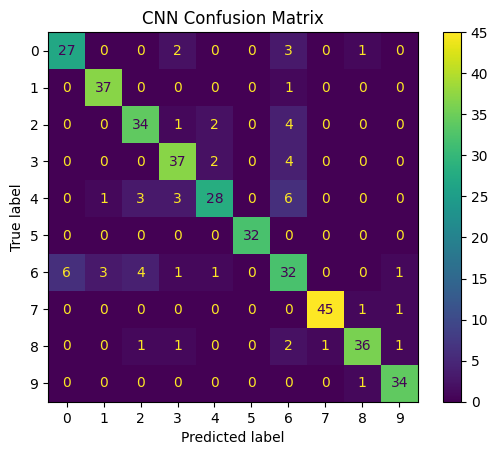

In [859]:
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp_cnn.plot()
disp_cnn.ax_.set_title("CNN Confusion Matrix")
plt.show()

## 9-`SVM`. Evaluate results

### 9.1-`SVM`. Accuracy score

Accuracy: measures the proportion of correctly classified instances out of the total number of instances in the test set.

In [860]:
acc_svm = accuracy_score(y_test_flatten, y_pred_svm)

print("Accuracy:", acc_svm)

Accuracy: 0.7825


### 9.2-`SVM`. R2-Score

Evaluate the performance on the testing data using the R-squared score. This score measures how well the model fits the data.

Score of 1.0 = perfect fit and score of 0.0 = not fit at all.

In [861]:
r2_score_svm = r2_score(y_test_flatten, y_pred_svm)

print(r2_score_svm)

0.6324138079961994


### 9.3-`SVM`. Confusion Matrix

I wanted to display a summary of the number of correct and incorrect predictions made by a model compared to the actual values in the test set. Therefor I chose for the confusion matrix


**Labels**

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

In [862]:
cm_svm = confusion_matrix(y_test_flatten, y_pred_svm)  

print(cm_svm)

[[29  0  0  2  0  1  1  0  0  0]
 [ 1 35  2  0  0  0  0  0  0  0]
 [ 0  0 36  0  4  0  1  0  0  0]
 [ 7  0  1 33  0  0  2  0  0  0]
 [ 0  0  3  5 33  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  2  0  1]
 [11  0 15  2  7  2 10  0  0  1]
 [ 0  0  0  0  0  4  0 42  0  1]
 [ 0  0  2  3  0  2  0  1 33  1]
 [ 0  0  0  0  0  2  0  0  0 33]]


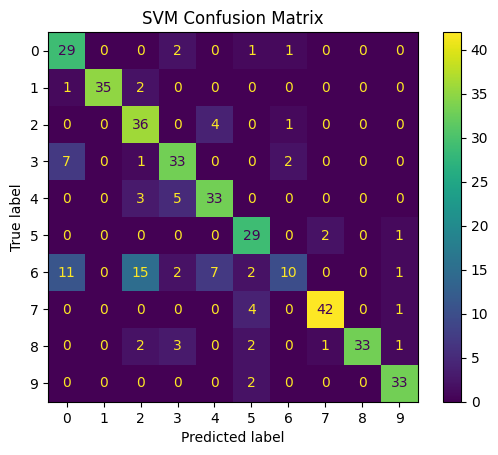

In [863]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot() 
disp_svm.ax_.set_title("SVM Confusion Matrix")
plt.show()

## 10. Conclusion

I have used both SVM and CNN models to classify the fashion items in the MNIST dataset. While both models performed relatively well, the CNN model was found to be slightly better than the SVM model. It achieved an accuracy score of 0.855, while the SVM model achieved an accuracy score of 0.782. 

During the process, I faced some challenges with the SVM model, particularly in flattening the images. This took up some time and required more effort compared to the CNN model, which was easier to create. Overall, the CNN model proved to be a more effective classifier for the fashion MNIST dataset.

From the confusion matrices, we can also see that the CNN model performed better than the SVM model in most of the classes. The CNN model had higher values on the diagonal, indicating that it correctly classified more items. T

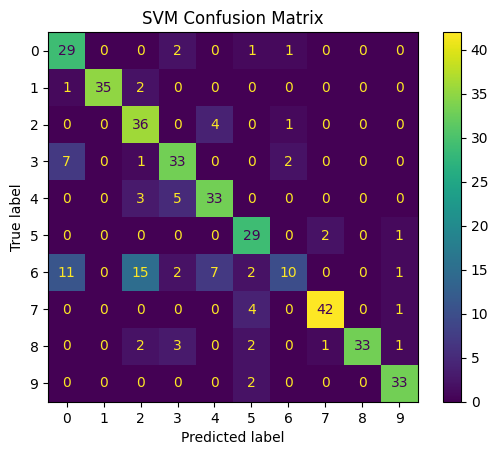 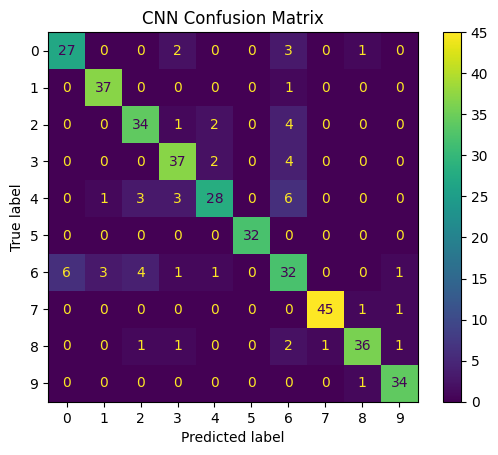


The CNN model achieved a higher accuracy rate,  as seen by its greater accuracy rate and the better results in the confusion matrix. Therefor my prediction was spot on.